# Naive sampling on toy example

In this notebook we propagate samples obtained by the naive sampling method from p-boxes described in the appendix to obtain a singular output distribution within the output p-box. 

This experiment is not relevant to our main results, however it is included to document our work.

In [1]:
include("../src/DSI.jl")
include("../src/Zono_utils.jl")
include("../src/PZono.jl")
include("../src/DSZ.jl")
include("../src/propagation.jl")

check_property (generic function with 1 method)

In [5]:
print_figures = true;

In [2]:
# Toy example: defining the network
W1 = [1 -1.0; 1.0 1.]
b = [0.0; 0.0]
W2 = [1 -1.0; 1.0 1.]
L1 = Layer(W1, b, ReLU())
L2 = Layer(W2, b, Id())
full_net = Network([L1; L2])

# input range
x = [interval(-2,2),interval(-1.,1.)]

2-element Vector{Interval{Float64}}:
 [-2, 2]
 [-1, 1]

In [8]:
using PyPlot
ProbabilityBoundsAnalysis.plot(x[1])
PyPlot.savefig("input_range.png")

In [330]:
u = Base.rand()
a = uniform(0, 1)
s = cut(a, u)
typeof(s)

Interval{Float64}

In [4]:
y = sample_from_pboxes(x, 1000)
y_prop = []
for i in 1:length(y)
    aux = compute_output(full_net, y[i])
    push!(y_prop, aux)
end
y_prop1 = [y_prop[i][1] for i in 1:length(y_prop)]
println(maximum(y_prop1))
y_prop2 = [y_prop[i][2] for i in 1:length(y_prop)]
println(maximum(y_prop2))

NaN
NaN


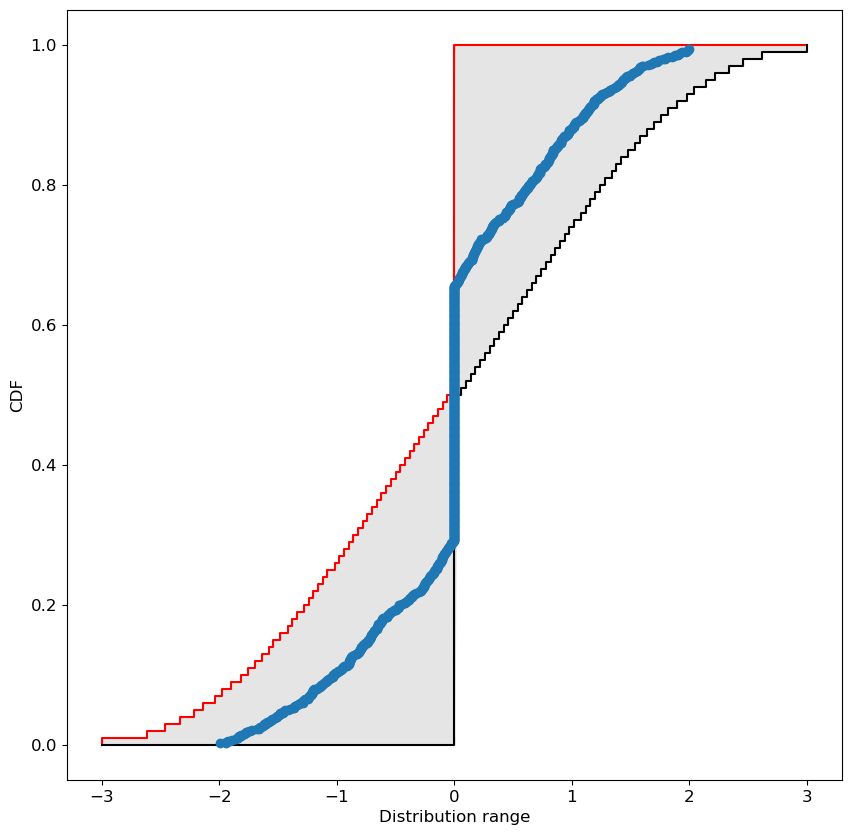

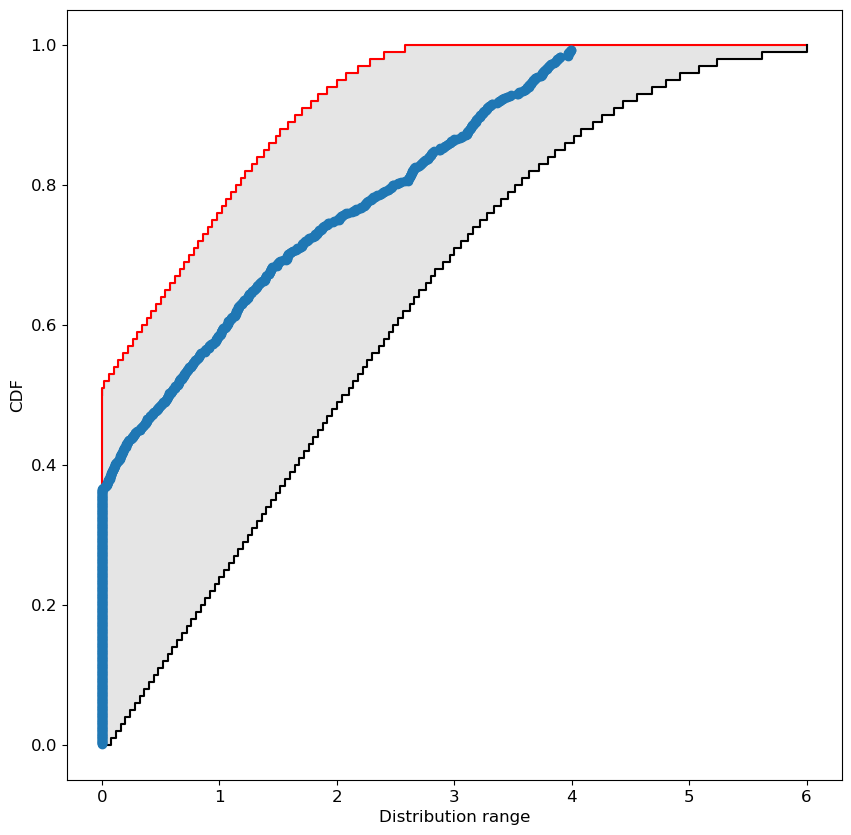

In [7]:
#pyplot()
# Running the example with 2 focal elements
nb_discretization_steps = 100
ProbabilityBoundsAnalysis.setSteps(nb_discretization_steps)
px = uniform.(inf.(x),sup.(x)) 
# Printing the pbox
pz = pbox_approximate_nnet(full_net,px,true) # independent inputs
if print_figures
    ProbabilityBoundsAnalysis.plot(pz[1])
    sorted_data, cdf = empirical_cdf(y_prop1)
    plot(sorted_data, cdf, marker="o", linestyle="-", label="Empirical CDF")
    PyPlot.savefig("plot1.png")

    ProbabilityBoundsAnalysis.plot(pz[2])
    sorted_data, cdf = empirical_cdf(y_prop2)
    plot(sorted_data, cdf, marker="o", linestyle="-", label="Empirical CDF")
    PyPlot.savefig("plot2.png")
end